In [198]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
print("Success")

Success


In [199]:
train_data = pd.read_csv("data/train.csv")

In [200]:
train_data.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [201]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [202]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [203]:
train_data.shape

(8693, 14)

C:\Users\User\AppData\Local\Temp\ipykernel_7496\1460146067.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr())


<Axes: >

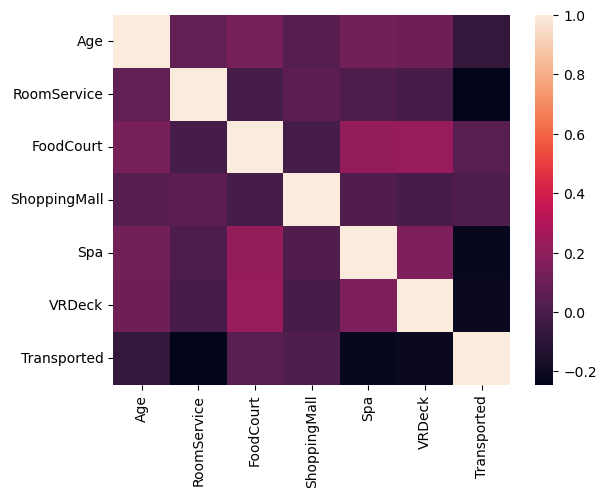

In [204]:
sns.heatmap(train_data.corr())

In [205]:
train_data["Destination"].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [206]:
train_data["Transported"] = train_data["Transported"].replace({True: 1, False: 0})

train_data["HomePlanet"] = train_data["HomePlanet"].fillna("Earth")
train_data["HomePlanet"] = train_data["HomePlanet"].replace({"Europa": 0, "Earth" : 1, "Mars" : 2})

train_data["CryoSleep"] = train_data["CryoSleep"].replace({True: 1, False: 0})
train_data["CryoSleep"] = train_data["CryoSleep"].fillna(0)
train_data['CryoSleep'] = train_data['CryoSleep'].astype(np.int64)

train_data["Destination"] = train_data["Destination"].fillna("TRAPPIST-1e")
train_data["Destination"] = train_data["Destination"].replace({"TRAPPIST-1e": 0, "PSO J318.5-22" : 1, "55 Cancri e" : 2})

"""
earth = 4602
Europa = 2131
Mars = 1759
"""
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,0,0,B/0/P,0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,1,0,F/0/S,0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,0,0,A/0/S,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,0,0,A/0/S,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,1,0,F/1/S,0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [207]:
train_data.groupby("CryoSleep").count()

,PassengerId,HomePlanet,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
CryoSleep,,,,,,,,,,,,,
0,5656,5656,5541,5656,5559,5528,5543,5543,5544,5538,5530,5518,5656
1,3037,3037,2953,3037,2955,2962,2969,2967,2941,2972,2975,2975,3037


In [208]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   int64  
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 950.9+ KB


In [209]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)

listik = ["Transported","HomePlanet","Destination", "CryoSleep"]

for train_indices, test_indices in split.split(train_data, train_data[listik].iloc[:,1]):
    strat_train_set = train_data.loc[train_indices]
    strat_test_set = train_data.loc[test_indices]

<Axes: >

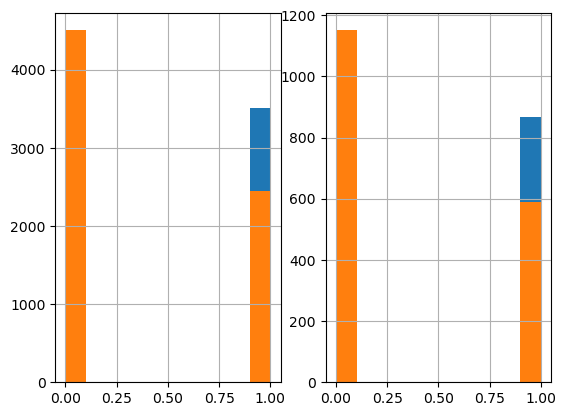

In [210]:
plt.subplot(1,2,1)
strat_train_set["Transported"].hist()
strat_train_set["CryoSleep"].hist()

plt.subplot(1,2,2)
strat_test_set["Transported"].hist()
strat_test_set["CryoSleep"].hist()

<Axes: >

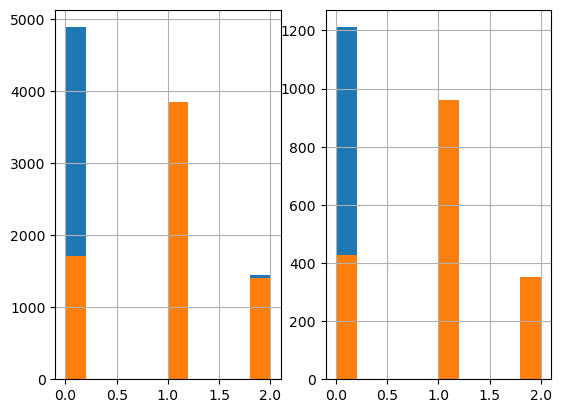

In [211]:
plt.subplot(1,2,1)
strat_train_set["Destination"].hist()
strat_train_set["HomePlanet"].hist()

plt.subplot(1,2,2)
strat_test_set["Destination"].hist()
strat_test_set["HomePlanet"].hist()

In [215]:
strat_train_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
5967,6324_02,1,0,G/1025/S,2,44.0,False,0.0,0.0,0.0,0.0,0.0,Murie Hinetthews,1
8116,8669_01,1,0,F/1677/S,0,31.0,False,949.0,0.0,22.0,0.0,0.0,Morrie Cartiz,0
6871,7271_01,1,0,G/1171/P,2,21.0,False,61.0,201.0,222.0,161.0,60.0,NaN,0
6564,6925_01,1,0,G/1120/P,0,26.0,False,0.0,0.0,677.0,1.0,108.0,Juanie Hayerson,0
2710,2902_01,1,0,G/471/P,0,33.0,False,123.0,760.0,0.0,0.0,0.0,Lyney Merkins,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,6075_01,0,1,B/206/P,0,26.0,False,0.0,0.0,0.0,0.0,0.0,Wasalm Sofraten,1
4310,4594_01,0,0,C/144/P,0,64.0,False,77.0,2424.0,0.0,3001.0,127.0,Tabius Folhal,0
4854,5180_01,1,1,G/835/P,1,20.0,False,0.0,0.0,0.0,NaN,0.0,Felia Gillock,1
4002,4261_01,2,0,D/137/S,2,56.0,False,412.0,492.0,9.0,117.0,33.0,Vivers Fatte,1


In [213]:
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, x, y= None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy = "mean")
        X["Age"] = imputer.fit_transform(X[["Age"]])
        return X

In [214]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()
        column_names = ["C", "S", "Q", "N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]  
        matrix = encoder.fit_transform(X[["Sex"]]).toarray()
        
        column_names = ["Male", "Female"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        return X